<a href="https://colab.research.google.com/github/thanusha22/BlackFriday-Sales/blob/main/BLACK_FRI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


In [ ]:
name = ("hello");
print(name)

hello


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv('/content/sample_data/train.csv')
df
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace('+','').astype(int)
def random_age_replace(df_in,old_col,new_col):
    np.random.seed(1)
    df_out = df_in.copy()
    df_out[new_col] = df_out[old_col]
    vals = df_out[old_col].value_counts()
    for i in vals.index:
        if len(i.split('-')) > 1:
            low = int(i.split('-')[0])
            high = int(i.split('-')[1])
            size = df_out[df_out[new_col] == i].shape[0]
            df_out.loc[df_out[old_col] == i, new_col] = np.random.randint(low,high,size)
        else:
            size = df_out[df_out[new_col] == i].shape[0]
            df_out.loc[df_out[old_col] == i, new_col] = np.random.randint(55,90,size)
    return df_out

df = random_age_replace(df,'Age','New_Age')
df.New_Age = df.New_Age.astype(int)
df

<ipython-input-10-ab5d76352ef7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.replace('+','').astype(int)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0,6
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0,7
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0,8
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0,6
4,1000002,P00285442,M,55+,16,C,4,0.0,8.0,NaN,NaN,7969.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203277,1001365,P00271142,F,0-17,10,C,3,0.0,5.0,NaN,NaN,5210.0,7
203278,1001365,P00251242,F,0-17,10,C,3,0.0,5.0,11.0,NaN,5385.0,16
203279,1001366,P00184942,M,0-17,10,C,0,0.0,1.0,8.0,17.0,15573.0,5
203280,1001366,P00237642,M,0-17,10,C,0,0.0,5.0,14.0,NaN,5262.0,16


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'New_Age'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                                2               0 

In [ ]:
df.shape

(550068, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  New_Age                     550068 non-null  int64  
dtypes: float64(2),

In [ ]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
New_Age                            0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.shape

(166821, 13)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
New_Age                       0
dtype: int64

In [ ]:
df.nunique()

User_ID                        5870
Product_ID                      528
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               12
Product_Category_2               14
Product_Category_3               15
Purchase                      13876
New_Age                          85
dtype: int64

In [ ]:
df.corr()

<ipython-input-227-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
User_ID,1.000000,-0.014519,-0.026347,0.018639,0.010370,0.009095,0.003419,-0.000590,0.033246
Occupation,-0.014519,1.000000,0.026696,0.027368,-0.013682,0.001336,0.013263,0.025048,0.093237
Stay_In_Current_City_Years,-0.026347,0.026696,1.000000,-0.014053,-0.002906,-0.000382,0.002093,0.007598,-0.005858
Marital_Status,0.018639,0.027368,-0.014053,1.000000,0.015682,0.014813,0.019473,0.004603,0.290292
Product_Category_1,0.010370,-0.013682,-0.002906,0.015682,1.000000,0.499115,0.229678,-0.396558,0.049388
Product_Category_2,0.009095,0.001336,-0.000382,0.014813,0.499115,1.000000,0.543649,-0.153711,0.045900
Product_Category_3,0.003419,0.013263,0.002093,0.019473,0.229678,0.543649,1.000000,-0.022006,0.054922
Purchase,-0.000590,0.025048,0.007598,0.004603,-0.396558,-0.153711,-0.022006,1.000000,0.022574
New_Age,0.033246,0.093237,-0.005858,0.290292,0.049388,0.045900,0.054922,0.022574,1.000000


In [ ]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None)


<ipython-input-228-f32989220311>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm', axis=None)


,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
User_ID,1.000000,-0.014519,-0.026347,0.018639,0.010370,0.009095,0.003419,-0.000590,0.033246
Occupation,-0.014519,1.000000,0.026696,0.027368,-0.013682,0.001336,0.013263,0.025048,0.093237
Stay_In_Current_City_Years,-0.026347,0.026696,1.000000,-0.014053,-0.002906,-0.000382,0.002093,0.007598,-0.005858
Marital_Status,0.018639,0.027368,-0.014053,1.000000,0.015682,0.014813,0.019473,0.004603,0.290292
Product_Category_1,0.010370,-0.013682,-0.002906,0.015682,1.000000,0.499115,0.229678,-0.396558,0.049388
Product_Category_2,0.009095,0.001336,-0.000382,0.014813,0.499115,1.000000,0.543649,-0.153711,0.045900
Product_Category_3,0.003419,0.013263,0.002093,0.019473,0.229678,0.543649,1.000000,-0.022006,0.054922
Purchase,-0.000590,0.025048,0.007598,0.004603,-0.396558,-0.153711,-0.022006,1.000000,0.022574
New_Age,0.033246,0.093237,-0.005858,0.290292,0.049388,0.045900,0.054922,0.022574,1.000000


<ipython-input-229-a0704ac99e65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"],color='y')


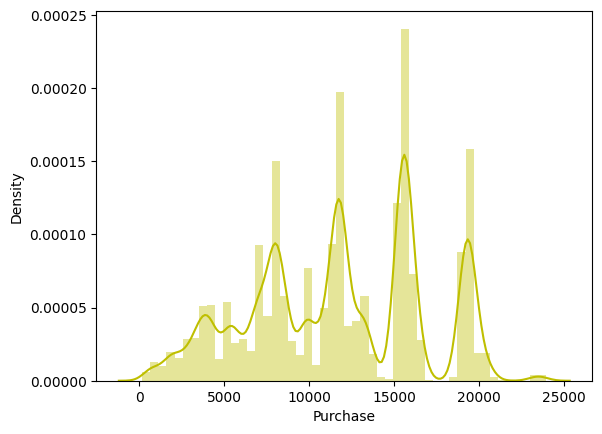

In [ ]:
sns.distplot(df["Purchase"],color='y')
plt.show()

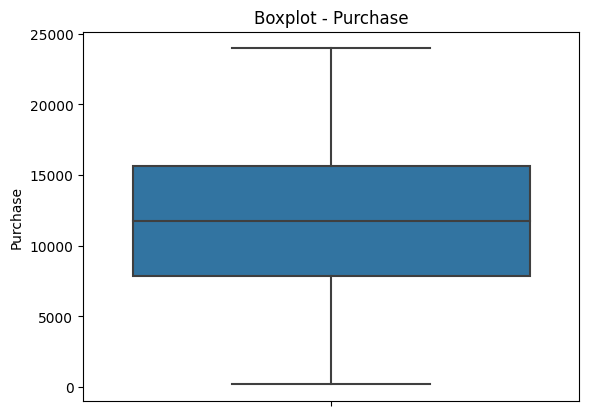

In [ ]:
sns.boxplot(y = 'Purchase', data = df)
plt.title("Boxplot - Purchase")
plt.show()

In [ ]:
df["Purchase"].skew()

-0.08458767367814019

In [ ]:
df["Purchase"].describe()

count    166821.000000
mean      11658.114980
std        5082.287959
min         185.000000
25%        7869.000000
50%       11756.000000
75%       15626.000000
max       23959.000000
Name: Purchase, dtype: float64

<ipython-input-233-c9a094db2a48>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").mean()["Purchase"].plot(kind= 'bar')


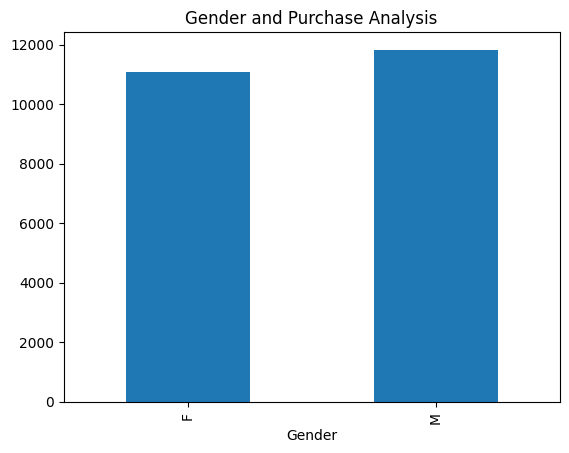

In [ ]:
df.groupby("Gender").mean()["Purchase"].plot(kind= 'bar')
plt.title("Gender and Purchase Analysis")
plt.show()

<ipython-input-234-219bfcd39a5a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')


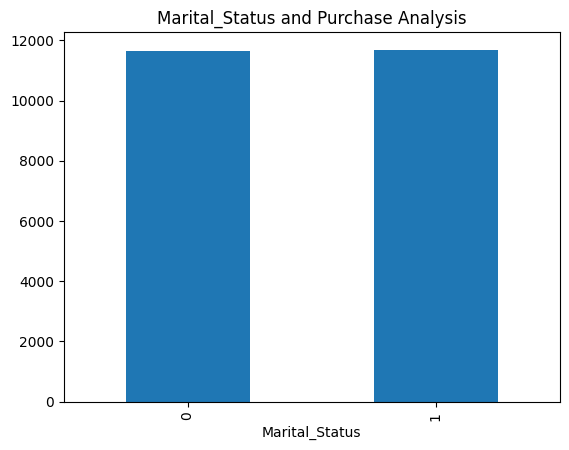

In [ ]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

In [ ]:
occ = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occ

<ipython-input-235-738876644430>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  occ = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])


,Purchase
Occupation,
0,11476.844118
1,11216.963511
2,11321.644609
3,11580.922433
4,11583.881864
5,11849.773361
6,11782.109525
7,11878.530165
8,11867.909594


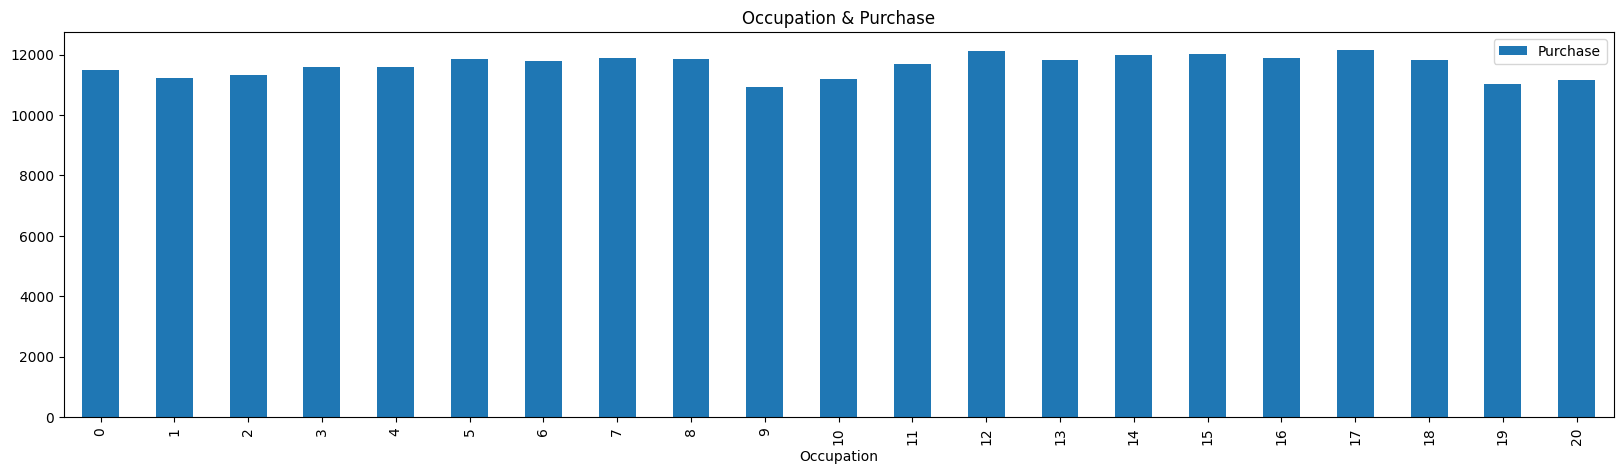

In [ ]:
occ.plot(kind='bar',figsize=(20,5))
plt.title("Occupation & Purchase")
plt.show()

<ipython-input-237-8819ffc4c385>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')


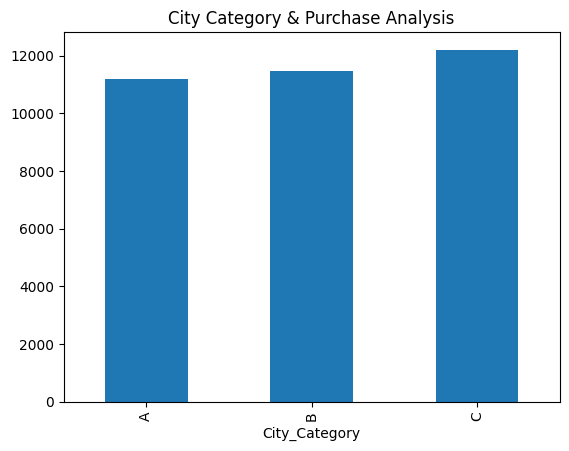

In [ ]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category & Purchase Analysis")
plt.show()

<ipython-input-238-7f708c27c6e8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')


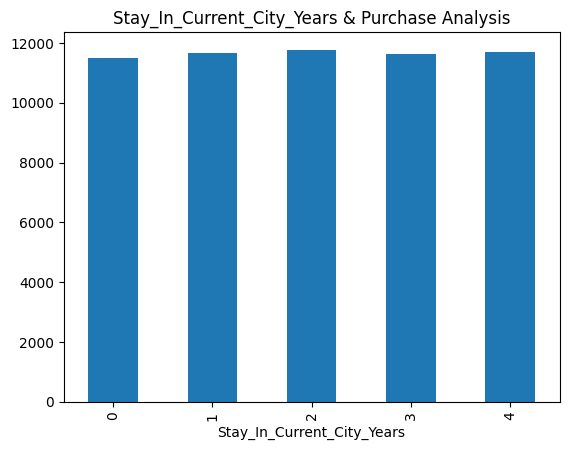

In [ ]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years & Purchase Analysis")
plt.show()

<ipython-input-239-c344404cca81>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Age").sum()['Purchase'].plot(kind="bar")


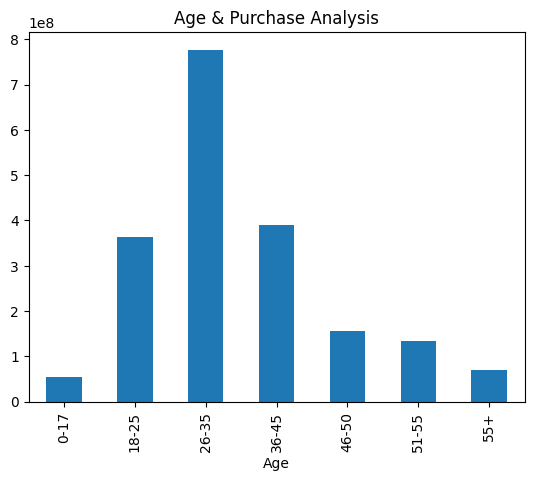

In [ ]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age & Purchase Analysis")
plt.show()

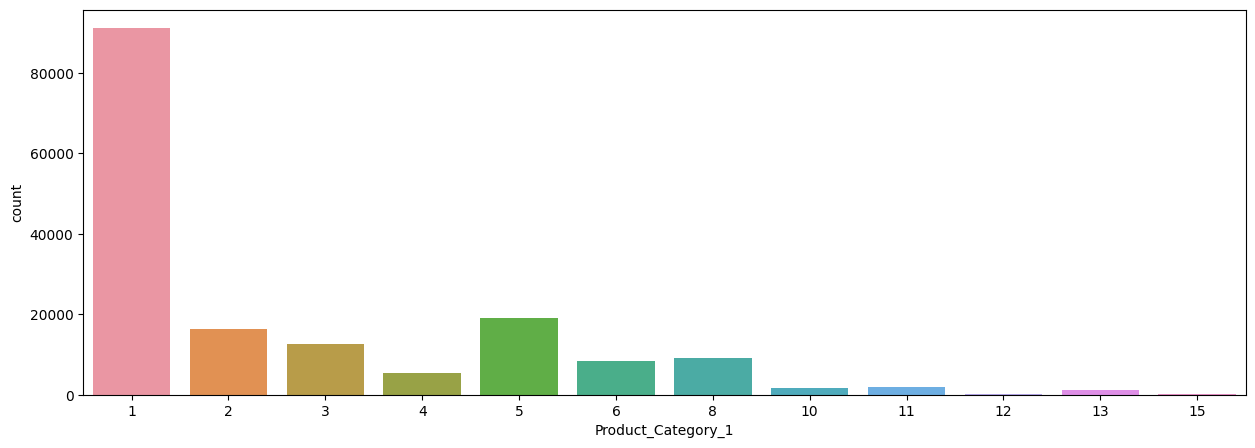

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Product_Category_1', data = df)
plt.show()

<ipython-input-241-fe045a62066a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))


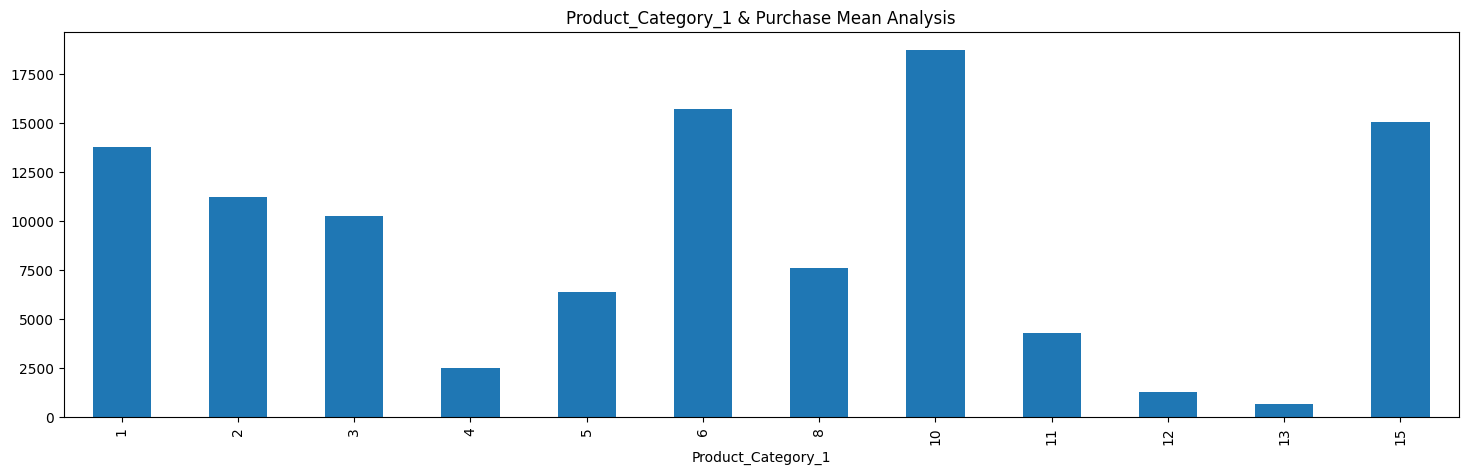

In [ ]:
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 & Purchase Mean Analysis")
plt.show()

<ipython-input-242-55c464a19cd9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))


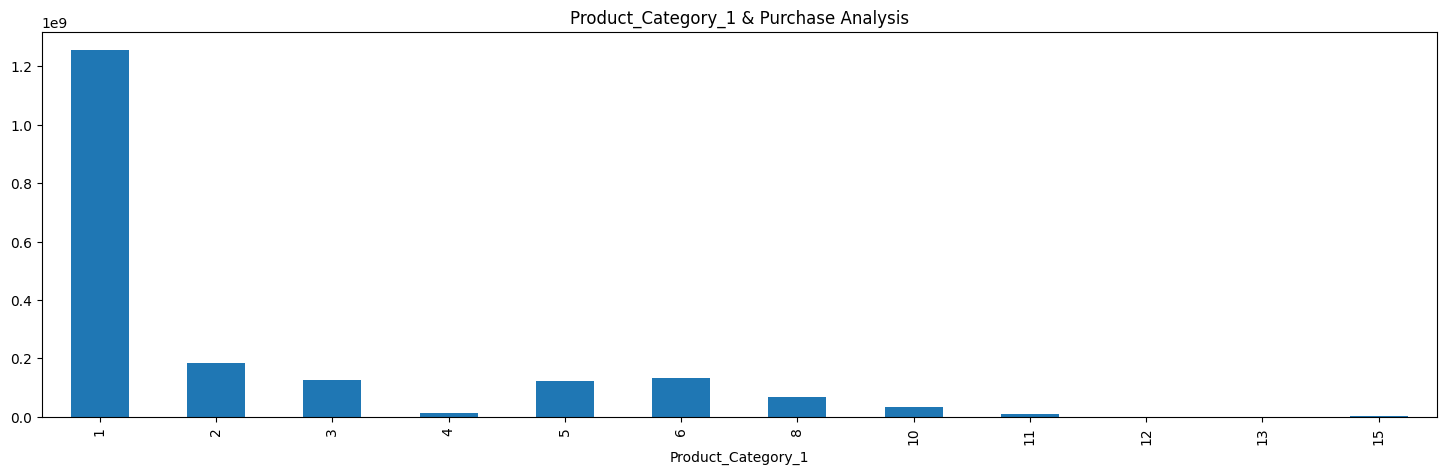

In [ ]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 & Purchase Analysis")
plt.show()

<ipython-input-324-614b75895139>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_2').sum()['Purchase'].plot(kind='bar',figsize=(18,5))


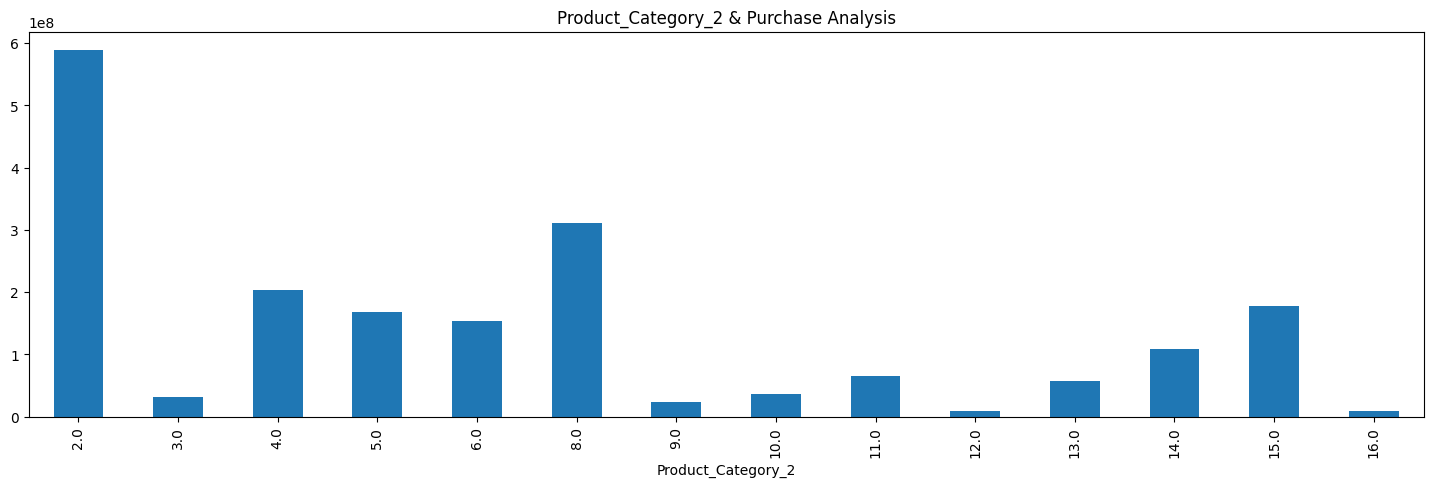

In [ ]:
df.groupby('Product_Category_2').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_2 & Purchase Analysis")
plt.show()

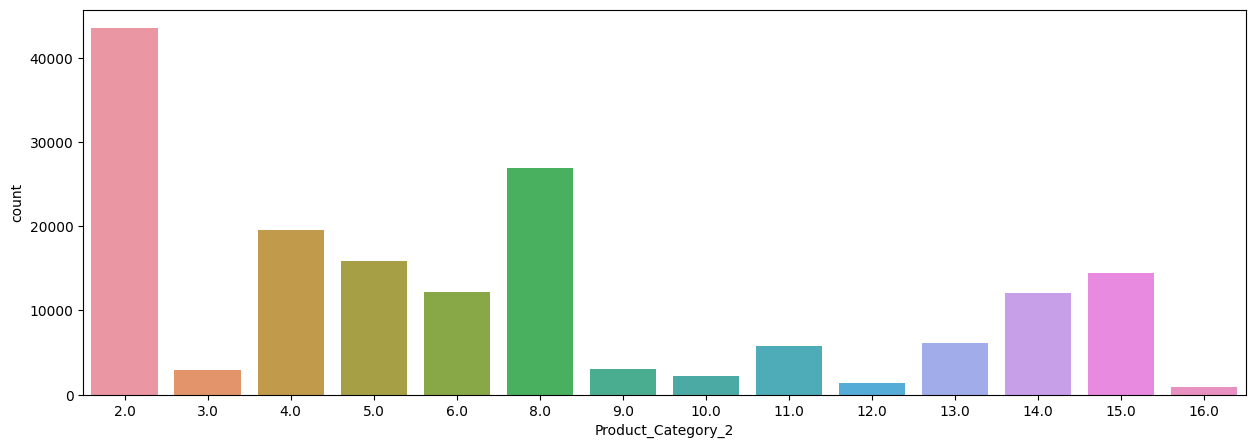

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Product_Category_2', data = df)
plt.show()

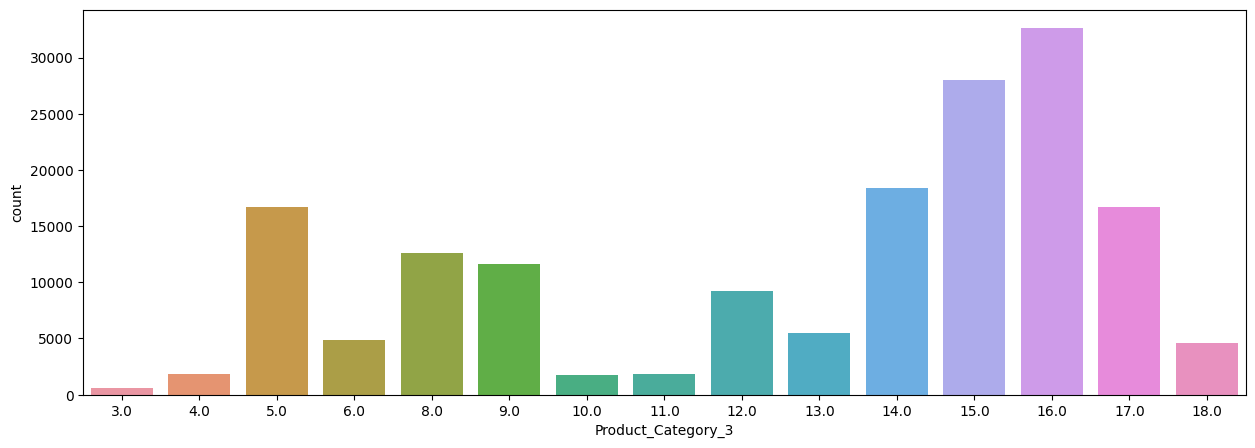

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Product_Category_3', data = df)
plt.show()

In [ ]:
df2 = df.copy()

In [ ]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0,6
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0,7
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0,8
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0,6
4,1000002,P00285442,M,55+,16,C,4,0.0,8.0,NaN,NaN,7969.0,57


In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
df2['Gender'] = lr.fit_transform(df2['Gender'])
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
0,1000001,P00069042,0,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0,6
1,1000001,P00248942,0,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0,7
2,1000001,P00087842,0,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0,8
3,1000001,P00085442,0,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0,6
4,1000002,P00285442,1,55+,16,C,4,0.0,8.0,NaN,NaN,7969.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203277,1001365,P00271142,0,0-17,10,C,3,0.0,5.0,NaN,NaN,5210.0,7
203278,1001365,P00251242,0,0-17,10,C,3,0.0,5.0,11.0,NaN,5385.0,16
203279,1001366,P00184942,1,0-17,10,C,0,0.0,1.0,8.0,17.0,15573.0,5
203280,1001366,P00237642,1,0-17,10,C,0,0.0,5.0,14.0,NaN,5262.0,16


In [ ]:
df2['Age'] = lr.fit_transform(df2['Age'])

In [ ]:
df2['City_Category'] = lr.fit_transform(df2['City_Category'])

In [ ]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_Age
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,5
6,1000004,P00184942,1,4,7,1,2,1,1,8.0,17.0,19215,47
13,1000005,P00145042,1,2,20,0,1,1,1,2.0,5.0,15665,27
14,1000006,P00231342,0,5,9,0,1,0,5,8.0,14.0,5378,54
16,1000006,P0096642,0,5,9,0,1,0,2,3.0,4.0,13055,51


In [ ]:
df2['Product_Category_2'] =df2['Product_Category_2'].fillna(0).astype('int64')
df2['Product_Category_3'] =df2['Product_Category_3'].fillna(0).astype('int64')

In [ ]:
df2.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
New_Age                       0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     166821 non-null  int64 
 1   Product_ID                  166821 non-null  object
 2   Gender                      166821 non-null  int64 
 3   Age                         166821 non-null  int64 
 4   Occupation                  166821 non-null  int64 
 5   City_Category               166821 non-null  int64 
 6   Stay_In_Current_City_Years  166821 non-null  int64 
 7   Marital_Status              166821 non-null  int64 
 8   Product_Category_1          166821 non-null  int64 
 9   Product_Category_2          166821 non-null  int64 
 10  Product_Category_3          166821 non-null  int64 
 11  Purchase                    166821 non-null  int64 
 12  New_Age                     166821 non-null  int64 
dtypes: int64(12), object(1)
memor

In [ ]:
df2.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'New_Age'],
      dtype='object')

In [ ]:
y = df2['Purchase']
X = df2.drop(['Purchase'], axis = 1)

In [ ]:
X = df2.drop(['User_ID','Product_ID'], axis =1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [ ]:
X_train.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,New_Age
474819,0,19,0,1,1,8,14,16,34
359319,1,17,0,4,0,13,15,16,26
394877,1,16,1,1,0,1,6,14,26
188256,1,1,2,1,1,6,8,15,47
528644,1,0,1,2,1,3,4,12,51


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

array([[-1.85550685,  1.66586208, -1.43128768, ...,  1.5771799 ,
         0.80821942, -0.00441935],
       [ 0.5389363 ,  1.3577947 , -1.43128768, ...,  1.79922596,
         0.80821942, -0.63227135],
       [ 0.5389363 ,  1.20376101, -0.11434986, ..., -0.19918857,
         0.32364905, -0.63227135],
       ...,
       [ 0.5389363 , -0.79867697, -0.11434986, ..., -0.19918857,
         0.32364905, -1.18164185],
       [ 0.5389363 , -0.1825422 , -1.43128768, ..., -0.64328069,
        -1.85691763,  0.23102515],
       [ 0.5389363 , -0.1825422 , -0.11434986, ..., -1.08737281,
        -1.85691763,  1.17280316]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
LR = LinearRegression().fit(X_train_scaled, y_train)
score = LR.score(X_test_scaled,y_test)

y_pred_LR = LR.predict(X_test_scaled)

print("Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_LR)))
print("MAE: ", mean_absolute_error(y_test, y_pred_LR))
print("Training Score : ", LR.score(X_train_scaled, y_train))
print("Testing Score : ", LR.score(X_test_scaled, y_test))



Results
MSE: 4641.484077587867
MAE:  3726.7411664787605
Training Score :  0.16828771155196842
Testing Score :  0.17221869104888432


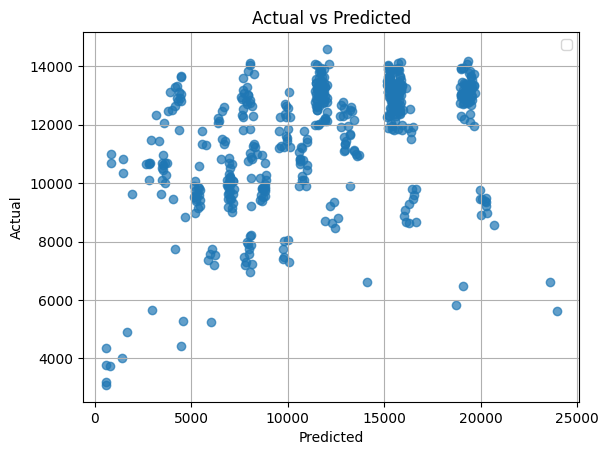

In [ ]:
y_test_1 = y_test[:500]
y_pred_LR_1 = y_pred_LR[:500]
fig, ax = plt.subplots()
plt.scatter(y_test_1, y_pred_LR_1, alpha =0.7)
plt.title("Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.legend()
ax.grid(True)

plt.show()

In [ ]:

from sklearn.tree import DecisionTreeRegressor
DT  = DecisionTreeRegressor(max_depth=10, random_state=42).fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
print("Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_DT)))
print("MAE: ", mean_absolute_error(y_test, y_pred_DT))
print("Training Score : ", DT.score(X_train, y_train))
print("Testing Score : ", DT.score(X_test, y_test))

Results
RMSE: 3567.028262094253
MAE:  2759.4604120114013
Training Score :  0.5284940902844891
Testing Score :  0.5111056855852272


In [ ]:

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(DT, out_file=None,
                                feature_names=X_train.columns,
                                filled=True)
graphviz.Source(dot_data, format="png")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(random_state=12, n_estimators=30)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

print("Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_RF)))
print("MAE: ", mean_absolute_error(y_test, y_pred_RF))
print("Training Score : ", RF.score(X_train, y_train))
print("Testing Score : ", RF.score(X_test, y_test))


Results
RMSE: 3809.930241254635
MAE:  2905.9099192392046
Training Score :  0.8535310520438392
Testing Score :  0.44225468121658307


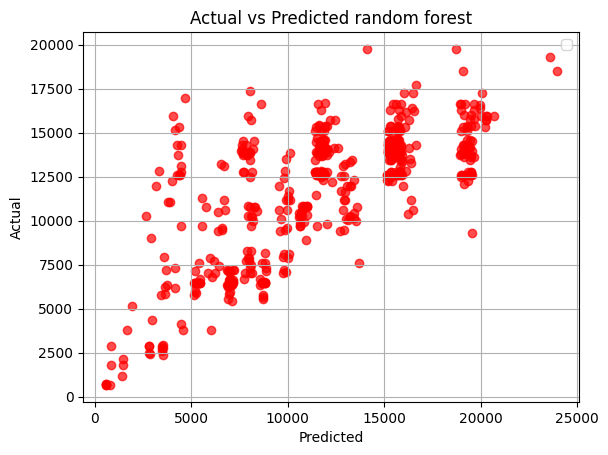

In [ ]:
y_test_1 = y_test[:500]
y_pred_RF_1 = y_pred_DT[:500]
fig, ax = plt.subplots()
plt.scatter(y_test_1, y_pred_RF_1, alpha =0.7, color='red')
plt.title("Actual vs Predicted random forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.legend()
ax.grid(True)

plt.show()

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred_XG = model.predict(X_test)

print("Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_XG)))
print("MAE: ", mean_absolute_error(y_test, y_pred_XG))
print("Training Score : ", model.score(X_train, y_train))
print("Testing Score : ", model.score(X_test, y_test))

Results
RMSE: 3486.329000077982
MAE:  2699.385533514792
Training Score :  0.5580839364105947
Testing Score :  0.532976619644864


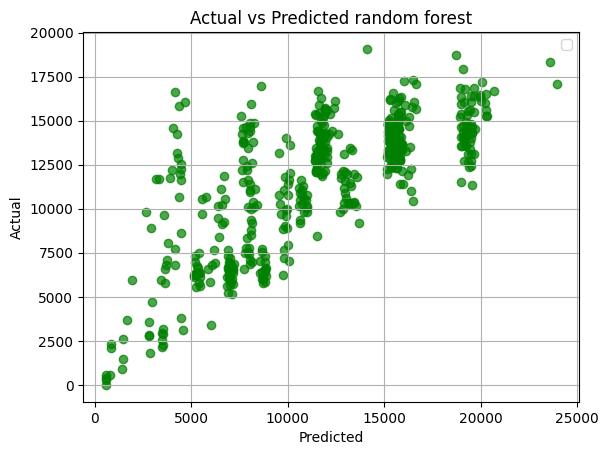

In [ ]:
y_test_1 = y_test[:500]
y_pred_XG_1 = y_pred_XG[:500]
fig, ax = plt.subplots()
plt.scatter(y_test_1, y_pred_XG_1, alpha =0.7, color='green')
plt.title("Actual vs Predicted random forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
ax.legend()
ax.grid(True)

plt.show()

In [ ]:
#create train/ test split
X = df2.drop(['User_ID','Product_ID','Age','Purchase'], axis=1)
y = df2.loc[:,'Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#########Data Impuation & Outlier Removal (Linear Regression) ###############
#outlier removal function

from sklearn.pipeline import Pipeline

reg_pipe = Pipeline([
    ('impute_trans', impute_preprocessor),
    ('categorical_trans', category_preprocessor),
    ('onehot', onehot_preprocessor)
])

X_Reg = reg_pipe.fit_transform(X_train)
X_Reg.head()


NameError: ignored

Modeling

Linear Regression

In [ ]:
#running linear regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit()
sm_X = sm.add_constant(X_Reg_fin)
sm_model_lr = sm.OLS(y_reg_fin, sm_X).fit()

TypeError: ignored

In [ ]:
print(sm_model_lr.summary())

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

model_lr.fit(X_Reg_fin, y_reg_fin)


In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(model_lr, X_Reg_fin, y_reg_fin, cv=3, scoring='neg_mean_squared_error')
print(lr_scores)

In [ ]:
#########Data Impuation, Outlier Removal, & Scaling (Ridge, Lasso, Elastic NEt, SVM) ###############
rr_pipe = Pipeline([
    ('impute_trans', impute_preprocessor),
    ('categorical_trans', category_preprocessor),
    ('feat_scaling', scaling_preprocessor),
    ('onehot', onehot_preprocessor)
])

X_rr = rr_pipe.fit_transform(X_train)
X_rr_fin, y_rr_fin = z_score_removal(X_rr,y_train,['New_Age','Purchase'],2)

Linear Regression + Regularization

In [ ]:
#Code for running ridge regression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

lasso_model = Lasso()
ridge_model = Ridge()
en_model = ElasticNet()

la_scores = cross_val_score(lasso_model, X_rr_fin, y_rr_fin, cv=3, scoring='neg_mean_squared_error')
print(la_scores)
r_scores = cross_val_score(ridge_model, X_rr_fin, y_rr_fin, cv=3, scoring='neg_mean_squared_error')
print(r_scores)
en_scores = cross_val_score(en_model, X_rr_fin, y_rr_fin, cv=3, scoring='neg_mean_squared_error')
print(en_scores)

Decision Tree Modeling

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
pred = model.predict(x_test)

submission = pd.DataFrame()
submission['User_ID'] = x_test['User_ID']
submission['Purchase'] = pred

submission.to_csv('submission.csv', index=False)

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split()